# Example application of the extended Kalman filter to the Van der Pol oscillator


This notebook demonstrates the application of the extended Kalman filter to the [Van der pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

In [210]:
import numpy as np 
import matplotlib.pyplot as plt 
import scienceplots
plt.style.use('science')

class VanDerPol:
    """ Simulates the signal from a Van der Pol oscillator with process noise. 
    
    The observation is an arbitrary, non-linear combination of the states
    """
    
    def __init__(self,μ,σp,σm, x, y,seed):
    
        self.μ  = μ
        self.σp = σp 
        self.σm = σm
        self.x  = x
        self.y  = y
        self.generator = np.random.default_rng(seed)



        
    def take_a_timestep(self):
        """ Call once for each new measurement at dt time from last call.
            Uses a basic Euler method.
        """
        

        dx = self.y + self.generator.normal(0, self.σp) #add some process noise to dx
        dy = self.μ*(1-self.x**2)*self.y - self.x 

        self.x = self.x  + self.dt*dx 
        self.y = self.y  + self.dt*dy
        
        observation = self.x*self.y + self.generator.normal(0, self.σm) 

        return self.x,self.y,observation



    def integrate(self,dt,n_steps):
        """ Integrate for n_steps timesteps and return an array that holds the states and observations
        """

        self.dt = dt
        self.n_steps   = n_steps

        self.t            = np.arange(0,self.n_steps*self.dt,self.dt)
        self.output_array = np.zeros((self.n_steps,3)) 

        for i in range(self.n_steps):
            self.output_array[i,:] = VDP.take_a_timestep()



    def plot_phase_space(self):
        """
        A plotting function which plots the evolution in the x-y phase plane
        """


        #Setup the figure
        h,w = 8,8
        rows = 1
        cols = 1
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)
    
        x = self.output_array[:,0]
        y = self.output_array[:,1]
        ax.plot(x,y)
        

        #Clean up axes
        fs=20
        ax.set_xlabel('x', fontsize=fs)
        ax.set_xlabel('y', fontsize=fs)
        ax.xaxis.set_tick_params(labelsize=fs-4)
        ax.yaxis.set_tick_params(labelsize=fs-4)


    def plot_timeseries(self):
        """
        A plotting function which plots the states/observations as a function of time
        """


        #Setup the figure
        h,w = 12,12
        rows = 3
        cols = 1
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)


        axes[0].plot(self.t,self.output_array[:,0])
        axes[1].plot(self.t,self.output_array[:,1])
        axes[2].plot(self.t,self.output_array[:,2])
        
    
        #Clean up axes
        fs=20
        axes[2].set_xlabel('t', fontsize=fs)

        axes[0].set_ylabel('x', fontsize=fs)
        axes[1].set_ylabel('y', fontsize=fs)
        axes[2].set_ylabel('z', fontsize=fs)

        plt.subplots_adjust(hspace=0.0)

        for ax in axes:
            ax.xaxis.set_tick_params(labelsize=fs-4)
            ax.yaxis.set_tick_params(labelsize=fs-4)

        # ax.legend(prop={'size':fs})



In [214]:
#Parameters of the system
μ    = 3.0
σp   = 2.0
σm   = 1.0
x0   = 1.0
y0   = .0
seed = 1

#Initialise the class
VDP = VanDerPol(μ,σp,σm, x0, y0,seed)

In [215]:
VDP.integrate(dt=0.01,n_steps=2000)

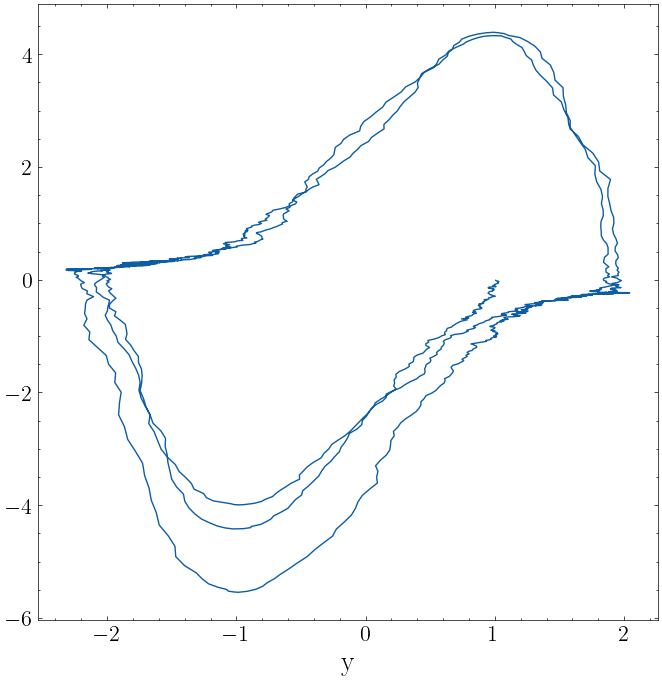

In [216]:
VDP.plot_phase_space()

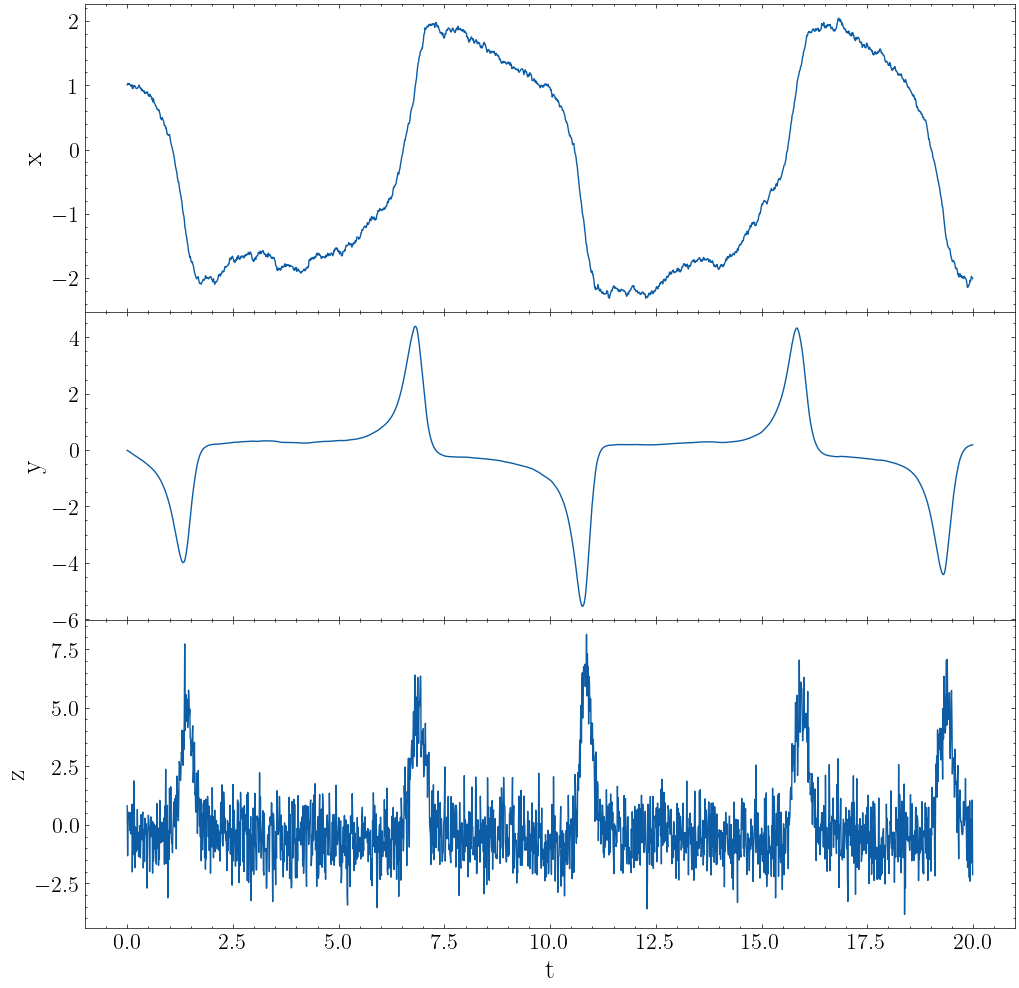

In [217]:
VDP.plot_timeseries()